<a href="https://colab.research.google.com/github/EnterTheBeginning/Machine-Learning/blob/master/HW1_Problem4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In progress: Graph the loss function Getting lower

## Importing libaries

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
plt.rcParams['figure.figsize'] = (10,15)
from matplotlib import pyplot as plt



## Importing dataset


In [2]:
from keras.datasets import mnist

(train_images_original, train_labels_original), (test_images_original, test_labels_original) = mnist.load_data()

Using TensorFlow backend.


##Normalize the data and Flattening

In [0]:
X_train = train_images_original.reshape((60000, 28 * 28))
X_train = X_train.astype('float32') / 255
y_train= train_labels_original
X_test = test_images_original.reshape((10000, 28 * 28))
X_test = X_test.astype('float32') / 255
y_test= test_labels_original


In [7]:
X_train.shape

(60000, 784)

In [8]:
X_test.shape

(10000, 784)

In [0]:
from keras.utils import to_categorical

y_train = to_categorical(train_labels_original)
y_test = to_categorical(test_labels_original)

##Keras 

In [0]:
from keras import layers, models

In [0]:
model = models.Sequential()

In [12]:
model.add(layers.Dense(10,input_shape=(784,),activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [14]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.fit(X_train, y_train, epochs=10, batch_size=128)

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
60000/60000 [==============================] - 1s 20us/step - loss: 0.6034 - acc: 0.8487
Epoch 2/10
60000/60000 [==============================] - 1s 18us/step - loss: 0.3303 - acc: 0.9083
Epoch 3/10
60000/60000 [==============================] - 1s 18us/step - loss: 0.3010 - acc: 0.9156
Epoch 4/10
60000/60000 [==============================] - 1s 18us/step - loss: 0.2878 - acc: 0.9193
Epoch 5/10
60000/60000 [==============================] - 1s 18us/step - loss: 0.2797 - acc: 0.9220
Epoch 6/10
60000/60000 [==============================] - 1s 17us/step - loss: 0.2741 - acc: 0.9234
Epoch 7/10
60000/60000 [==============================] - 1s 17us/step - loss: 0.2704 - acc: 0.9249
Epoch 8/10
60000/60000 [==============================] - 1s 17us/step - loss: 0.2674 - acc: 0.9263
Epoch 9/10
60000/60000 [==============================] - 1s 17us/step - loss: 0.2648 - acc: 0.9268
Epoch 10/10
60000/60000 [===========================

Model loss and accuracy:

##Test Result, Accuracy 

In [61]:
score = model.evaluate(X_test,y_test,verbose =0)
print('Test Loss:', score[0])
print('Test accuracy:' , score[1])


Test Loss: 0.2683306378006935
Test accuracy: 0.9269


confusion_matrix

In [63]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict_classes(X_test)
cm = confusion_matrix(test_labels_original,y_pred)
print(cm)

[[ 964    0    1    2    0    5    5    2    1    0]
 [   0 1115    2    2    0    1    4    2    9    0]
 [   5    7  924   18    7    2   13   10   42    4]
 [   4    0   20  921    0   21    2   11   24    7]
 [   1    1    6    2  915    0    9    4   11   33]
 [   9    2    2   37   11  769   17    7   33    5]
 [  13    3    6    1    7   11  912    2    3    0]
 [   1    6   22    6    7    0    0  956    3   27]
 [   6    7    5   18    9   23    9   11  881    5]
 [  11    7    1   11   28    6    0   26    7  912]]


#Correct predictions

In [0]:
predicted_classes = model.predict_classes(X_test)
correct_indices = np.nonzero(predicted_classes == test_labels_original)[0]
incorrect_indices = np.nonzero(predicted_classes != test_labels_original)[0]



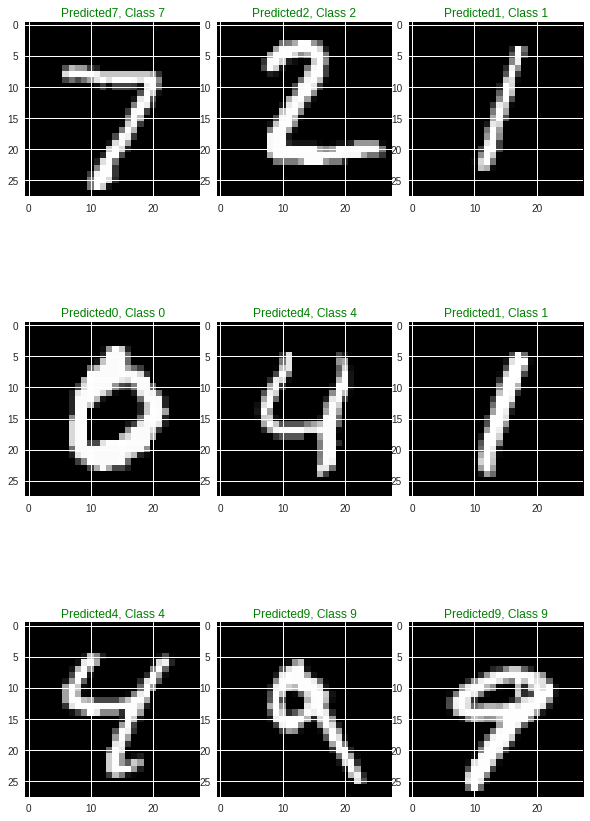

In [75]:
for i, correct in enumerate(correct_indices[:9]):
   plt.subplot(3,3,i+1)
   plt.subplots_adjust(hspace = 0.4, wspace = 0.1)

   plt.imshow(X_test[correct].reshape(28,28) , cmap ='gray', interpolation ='none')
   plt.title("Predicted{}, Class {}".format(predicted_classes[correct],test_labels_original[correct]),color = 'green')


# Incorrect predictions


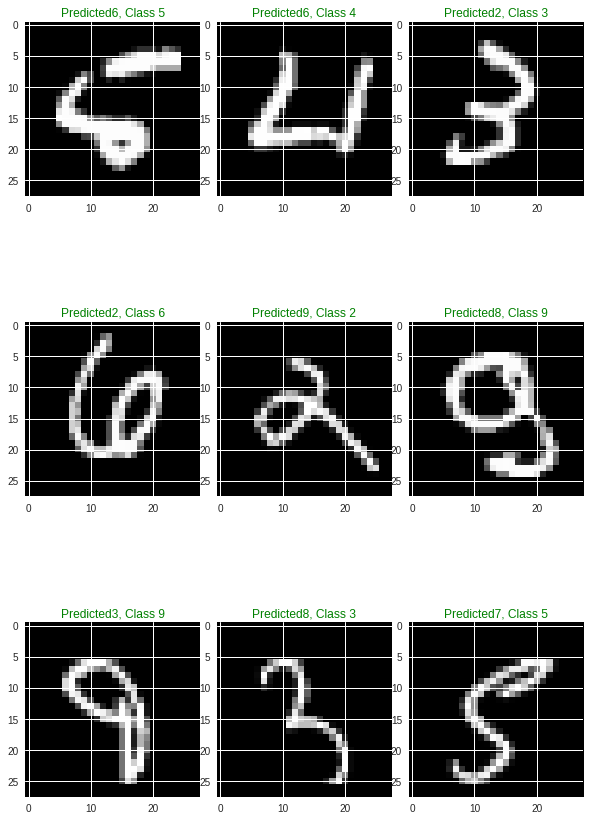

In [80]:
plt.figure()
for i, correct in enumerate(incorrect_indices[:9]):
   plt.subplot(3,3,i+1)
   plt.subplots_adjust(hspace = 0.4, wspace = 0.1)

   plt.imshow(X_test[correct].reshape(28,28) , cmap ='gray', interpolation ='none')
   plt.title("Predicted{}, Class {}".format(predicted_classes[correct],test_labels_original[correct]),color = 'green')
